In [405]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [406]:
# Util functions
def hist(df, column):
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins="auto")
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()

In [407]:
# Loading cleaned dataset
dataset_path = "../data/processed/cleaned_dataset.csv"
df = pd.read_csv(dataset_path)
df_numerical = df.drop(columns=["ID"])

In [408]:
hierarchical_df = df_numerical.copy()
columns_to_use = ['n_visitas', 'monto_compras', 'monto_descuentos']
subset_data = hierarchical_df[columns_to_use]
scaler = MinMaxScaler()
scaled_subset = scaler.fit_transform(subset_data)

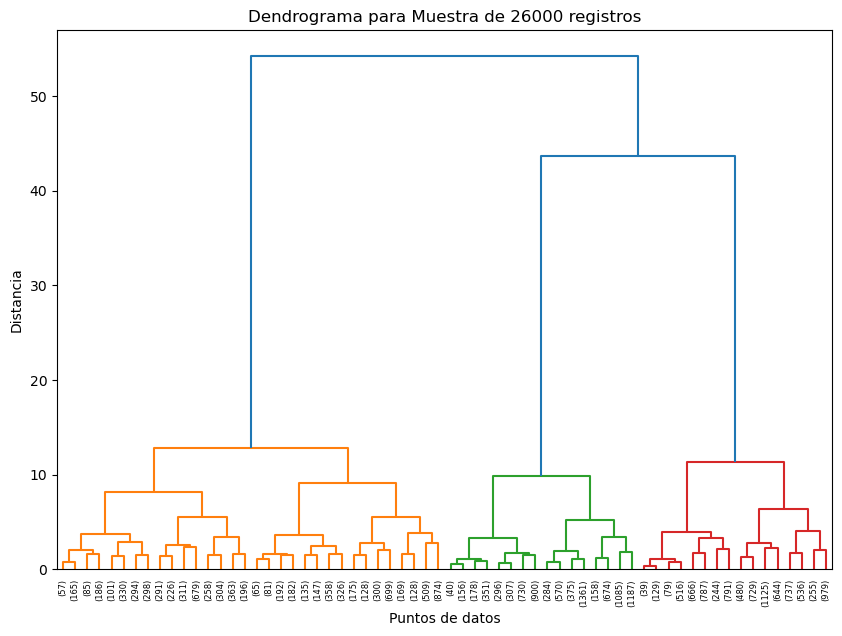

In [409]:
sample_size = 26000
random_indices = np.random.choice(scaled_subset.shape[0], sample_size, replace=False)
sampled_subset = scaled_subset[random_indices]

linked_sample = linkage(sampled_subset, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked_sample, truncate_mode='level', p=5)
plt.title('Dendrograma para Muestra de 26000 registros')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia')
plt.show()

In [410]:
n_clusters = 3

clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = clustering.fit_predict(sampled_subset, columns_to_use)

print("Primeras etiquetas de cluster asignadas:", labels[:10])

Primeras etiquetas de cluster asignadas: [1 2 0 2 1 2 0 0 1 2]


In [411]:
sampled_df = pd.DataFrame(sampled_subset)
sampled_df['Cluster'] = labels

print("\nDistribución por cluster:")
print(sampled_df['Cluster'].value_counts())

print("\nCaracterísticas promedio por cluster:")
print(sampled_df.groupby('Cluster').mean())


Distribución por cluster:
Cluster
1    8736
2    8652
0    8612
Name: count, dtype: int64

Características promedio por cluster:
                0         1         2
Cluster                              
0        0.488964  0.245310  0.507067
1        0.253162  0.573314  0.035991
2        0.339422  0.114116  0.065560


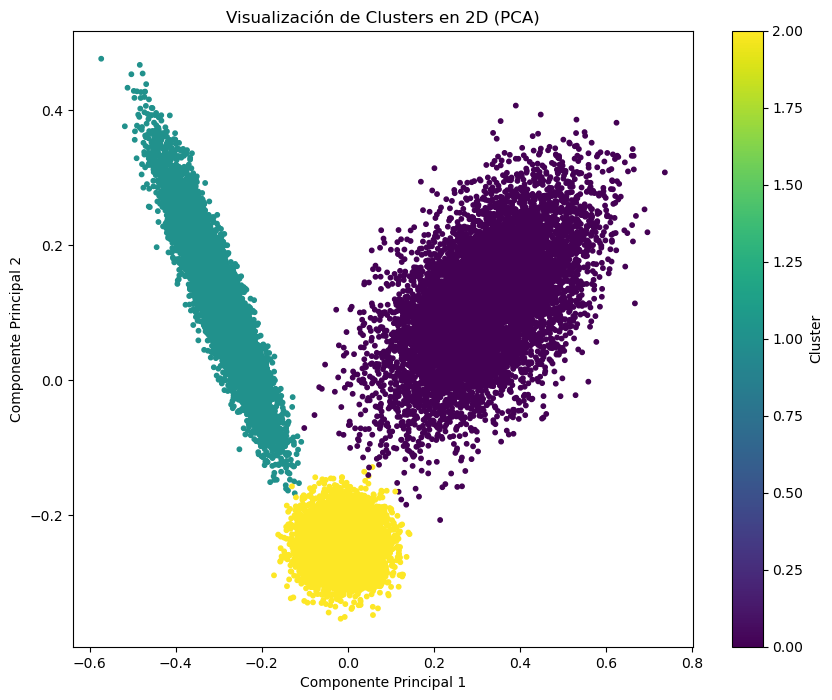

In [412]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(sampled_subset)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=10)
plt.colorbar(label='Cluster')
plt.title('Visualización de Clusters en 2D (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [413]:
silhouette_avg = silhouette_score(sampled_subset, labels)
davies_bouldin = davies_bouldin_score(sampled_subset, labels)

print(f"Coeficiente de Silueta: {silhouette_avg:.4f}")
print(f"Índice Davies-Bouldin: {davies_bouldin:.4f}")

Coeficiente de Silueta: 0.6339
Índice Davies-Bouldin: 0.5061


In [444]:
gaussian_df = df_numerical.copy()
columns_to_use_ = ['n_visitas', 'monto_compras', 'monto_descuentos']
subset_data_ = gaussian_df[columns_to_use_]
scaler_ = MinMaxScaler()
scaled_subset_ = scaler_.fit_transform(subset_data_)

In [445]:
n_clusters_ = 3  
gmm = GaussianMixture(
    n_components=n_clusters_, 
    covariance_type='full',  
    init_params='kmeans',    
    max_iter=100, 
    tol=1e-3, 
    random_state=42         
)
labels_ = gmm.fit_predict(scaled_subset_)

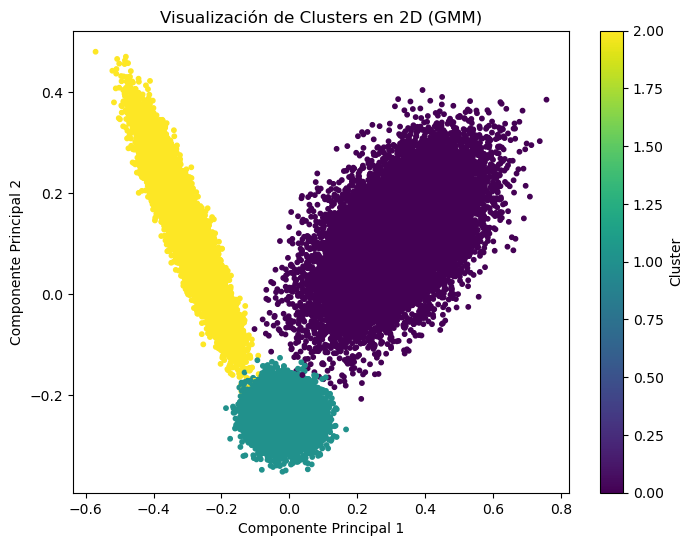

In [446]:
pca_ = PCA(n_components=2)
reduced_data_ = pca_.fit_transform(scaled_subset_)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_[:, 0], reduced_data_[:, 1], c=labels, cmap='viridis', s=10)
plt.colorbar(label='Cluster')
plt.title('Visualización de Clusters en 2D (GMM)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [447]:
silhouette_avg_ = silhouette_score(scaled_subset_, labels_)
davies_bouldin_ = davies_bouldin_score(scaled_subset_, labels_)

print(f"Coeficiente de Silueta: {silhouette_avg_:.4f}")
print(f"Índice Davies-Bouldin: {davies_bouldin_:.4f}")

Coeficiente de Silueta: 0.6319
Índice Davies-Bouldin: 0.5076
